In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 12

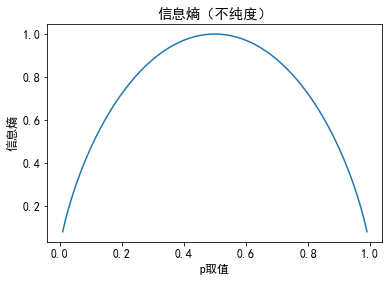

In [2]:
p = np.linspace(0.01, 0.99, 100)

# 计算在不同比例下的信息熵
h = -p * np.log2(p) - (1 - p) * np.log2(1 - p)
plt.plot(p, h)
plt.xlabel("p取值")
plt.ylabel("信息熵")
plt.title("信息熵（不纯度）")
plt.show()

In [3]:
def gini(p):
    """计算指定概率组合下的基尼系数 """
    return 1 - np.sum(p ** 2, axis=1)

def entropy(p):
    """计算指定概率组合下的信息熵 """
    return -np.sum(p * np.log2(p), axis=1)

def error(p):
    """计算指定概率组合下的错误率"""
    return 1 - np.max(p, axis=1)

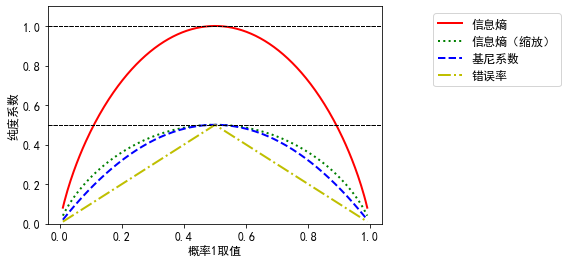

In [4]:
# 定义概率的取值范围。
p = np.linspace(0.01, 0.99, 200)
# 计算概率组合。
parray = np.array([p, 1 - p]).T
# 计算信息熵。
en = entropy(parray)
# 计算缩放的信息熵。
en2 = en * 0.5
# 计算错误率。
err = error(parray)
# 计算基尼系数。
g = gini(parray)
fig = plt.figure()
for i, lab, ls, c, in zip([en, en2, g, err], ["信息熵", "信息熵（缩放）", "基尼系数", "错误率"], ["-", ":", "--", "-."], ["r", "g", "b", "y"]):
    plt.plot(p, i, label=lab, linestyle=ls, lw=2, color=c)
    plt.legend(loc="right", bbox_to_anchor=(1.55, 0.8))
    plt.axhline(y=0.5, linewidth=1, color='k', linestyle="--")
    plt.axhline(y=1.0, linewidth=1, color='k', linestyle="--")
    plt.ylim([0, 1.1])
    plt.xlabel("概率1取值")
    plt.ylabel("纯度系数")
plt.show()

In [5]:
# 计算在不同类别数量时，信息熵的对比。每个元素代表一个类别所占的比例。
a1 = np.array([[0.4, 0.6]])
a2 = np.array([[0.3, 0.3, 0.2, 0.2]])
a3 = np.array([[0.1] * 10])
print(entropy(a1))
print(entropy(a2))
print(entropy(a3))

[0.97095059]
[1.97095059]
[3.32192809]


In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = load_iris(return_X_y=True)
# 为了后续的可视化方便，这里选择两个特征。
X = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# criterion：不纯度度量标准，默认为gini。
    # gini：基尼系数 entropy：信息熵
# splitter：选择分裂节点的方式。默认为best。
    # best：在最好的位置分裂节点。 random：在随机的位置分裂节点。
# max_depth：树的最大深度，默认为None（不限制深度）。
# min_samples_split：分裂节点的最小样本数，默认为2。
# min_samples_leaf：分裂节点后，叶子节点最少的样本数量，默认为1。
# max_features：分裂节点时，考虑的最大特征数量，默认为None（考虑所有特征）。
# random_state：随机种子。
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.9375
0.631578947368421


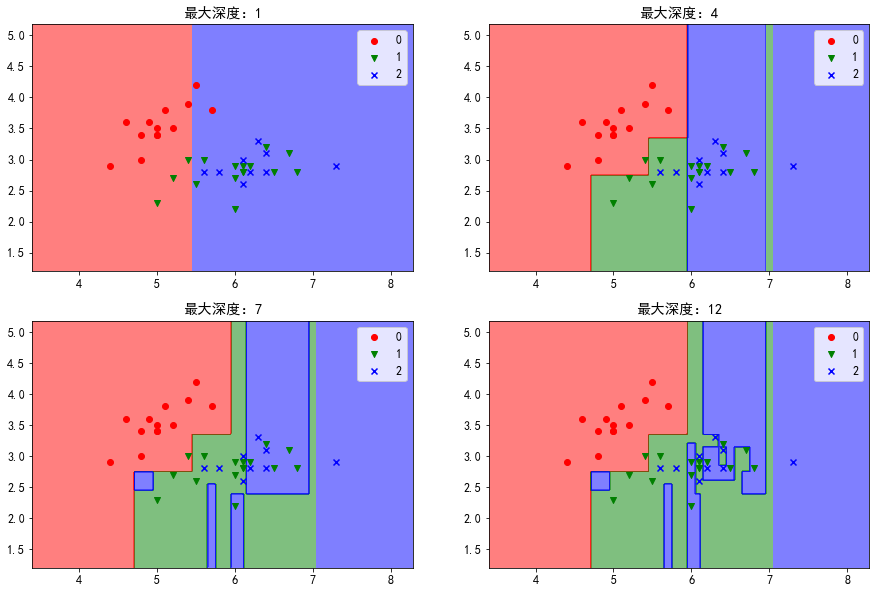

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y):
    color = ["r", "g", "b"]
    marker = ["o", "v", "x"]
    class_label = np.unique(y)
    cmap = ListedColormap(color[: len(class_label)])
    x1_min, x2_min = np.min(X, axis=0)
    x1_max, x2_max = np.max(X, axis=0)
    x1 = np.arange(x1_min - 1, x1_max + 1, 0.02)
    x2 = np.arange(x2_min - 1, x2_max + 1, 0.02)
    X1, X2 = np.meshgrid(x1, x2)
    Z = model.predict(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)
    plt.contourf(X1, X2, Z, cmap=cmap, alpha=0.5)
    for i, class_ in enumerate(class_label):
        plt.scatter(x=X[y == class_, 0], y=X[y == class_, 1], c=cmap.colors[i], label=class_, marker=marker[i])
    plt.legend()

plt.figure(figsize=(15, 10))
for index, depth in enumerate([1, 4, 7, 12], start=1):
    plt.subplot(2, 2, index)
    plt.title(f"最大深度：{depth}")
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth)
    tree.fit(X_train, y_train)
    plot_decision_boundary(tree, X_test, y_test)

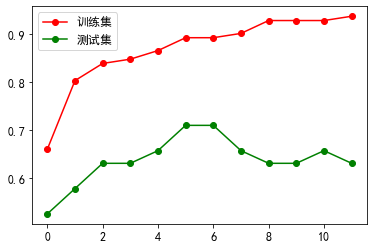

In [8]:
# 定义列表，用来存储在不同深度下，模型的分值。
train_score = []
test_score = []
for depth in range(1, 13):
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth)
    tree.fit(X_train, y_train)
    train_score.append(tree.score(X_train, y_train))
    test_score.append(tree.score(X_test, y_test))
    
plt.plot(train_score, marker="o", c="red", label="训练集")
plt.plot(test_score, marker="o", c="green", label="测试集")
plt.legend()

In [9]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# 回归决策树的参数，可以参考分类决策树的参数。
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.8290972700366354
0.6354364289453208
